In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [26]:
df = pd.read_csv("C:/Users/pbang/Downloads/archive/world-education-data.csv")

In [27]:
df.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


In [28]:
df['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic',
       'Early

In [29]:
df.shape

(5892, 11)

In [30]:
df.isnull().sum()

country                          0
country_code                     0
year                             0
gov_exp_pct_gdp               1393
lit_rate_adult_pct            4015
pri_comp_rate_pct             1452
pupil_teacher_primary         2216
pupil_teacher_secondary       2875
school_enrol_primary_pct       540
school_enrol_secondary_pct    1147
school_enrol_tertiary_pct     1500
dtype: int64

In [12]:
rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan['country'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Algeria', 'American Samoa', 'Andorra', 'Australia', 'Austria',
       'Bahamas, The', 'Barbados', 'Belgium', 'Bermuda', 'Bolivia',
       'Brazil', 'British Virgin Islands', 'Canada',
       'Caribbean small states', 'Curacao', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Equatorial Guinea', 'Euro area',
       'European Union', 'Fiji', 'Finland', 'France', 'Gambia, The',
       'Germany', 'Gibraltar', 'Grenada', 'Guam', 'Haiti', 'High income',
       'Hong Kong SAR, China', 'Iceland', 'Iraq', 'Ireland', 'Israel',
       'Japan', 'Kiribati', "Korea, Dem. People's Rep.", 'Libya',
       'Liechtenstein', 'Luxembourg', 'Micronesia, Fed. Sts.', 'Monaco',
       'Montenegro', 'Nauru', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Norway', 'Pacific island small states',
       'Post-demographic dividend', 'Sint Maarten (Dutch part)',
       'Slovak Republic', 'Solomon Islands', 'Somalia',
       'St

In [16]:
# rows_with_nan[rows_with_nan['country'] == 'Viet Nam']

In [ ]:
# rows_with_nan = df[df.isna().any(axis=1)]
# for coun in rows_with_nan['country'].unique():
#     rows_with_nan[rows_with_nan['country'] == coun]
#     inp = input('nhập để tiếp tục')


In [17]:
# df.loc[df['country'] == 'Afghanistan', numeric_cols].interpolate(method='linear')

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)
countries = df['country'].unique()

# Fill missing values for numeric columns with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for coun in countries:
    df.loc[df['country'] == coun, numeric_cols] = df.loc[df['country'] == coun, numeric_cols].interpolate(method='linear').ffill().bfill()

# Verify data types
df.dtypes

country                        object
country_code                   object
year                            int64
gov_exp_pct_gdp               float64
lit_rate_adult_pct            float64
pri_comp_rate_pct             float64
pupil_teacher_primary         float64
pupil_teacher_secondary       float64
school_enrol_primary_pct      float64
school_enrol_secondary_pct    float64
school_enrol_tertiary_pct     float64
dtype: object

In [ ]:
# # Drop duplicates
# df.drop_duplicates(inplace=True)
# countries = df['country'].unique()

# # Fill missing values for numeric columns with the median
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# for coun in countries:
#     for fearture in numeric_cols:
#         if df.loc[df['country'] == coun, fearture].iloc[0] == 'NaN':
#             df.loc[df['country'] == coun, fearture].iloc[0].replace(df.loc[df['country'] == coun, fearture].mean(), inplace = True)
#             df.loc[df['country'] == coun, fearture] = df.loc[df['country'] == coun, fearture].interpolate(method='linear').ffill().bfill()
#         else:
#             df.loc[df['country'] == coun, fearture] = df.loc[df['country'] == coun, fearture].interpolate(method='linear').ffill().bfill()

# # Verify data types
# df.dtypes

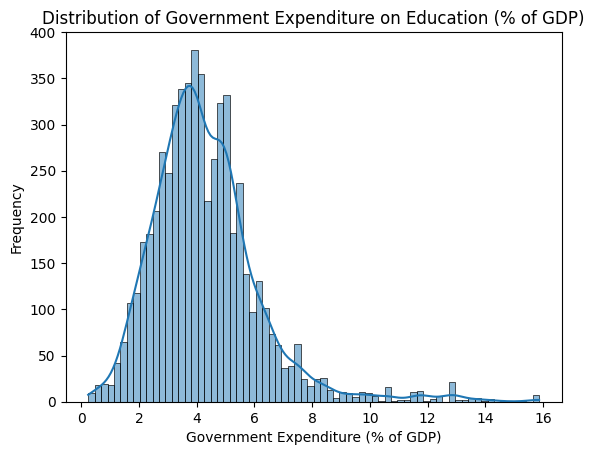

In [125]:
# Distribution of government expenditure on education
sns.histplot(df['gov_exp_pct_gdp'], kde=True)
plt.title('Distribution of Government Expenditure on Education (% of GDP)')
plt.xlabel('Government Expenditure (% of GDP)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
areas = ['Africa Eastern and Southern','Africa Western and Central','East Asia & Pacific','Europe & Central Asia','Latin America & Caribbean','Middle East & North Africa','South Asia']

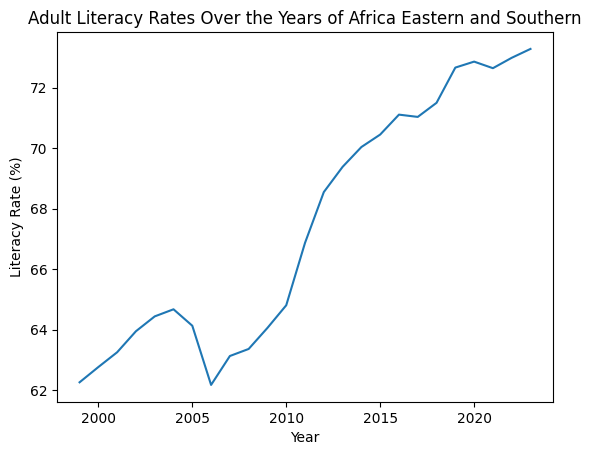

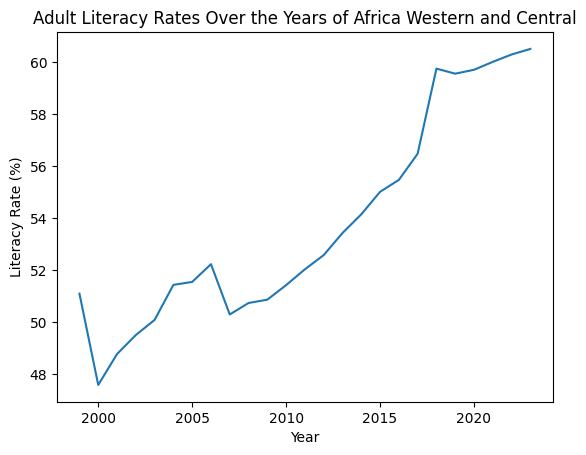

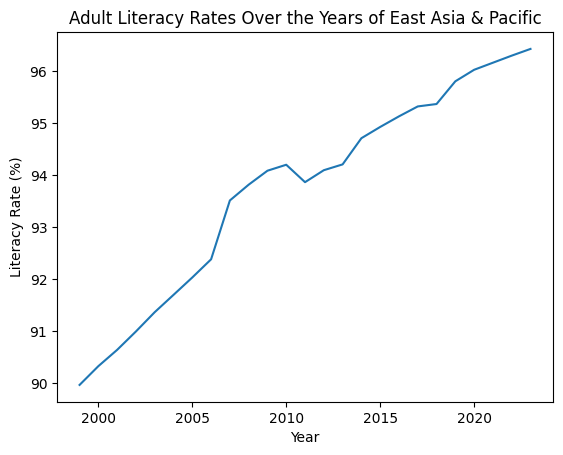

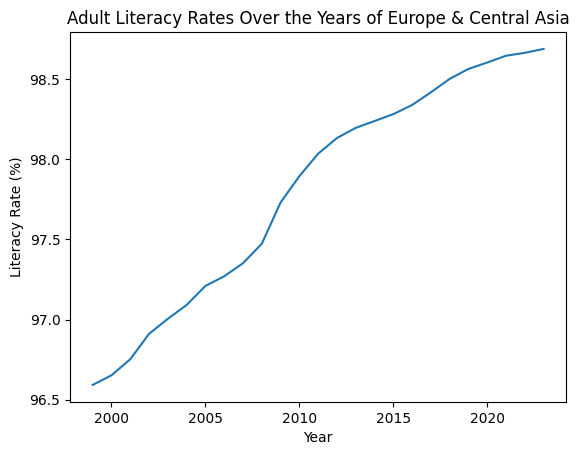

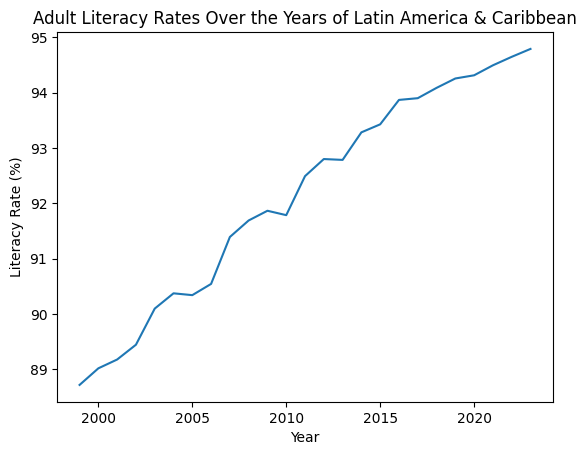

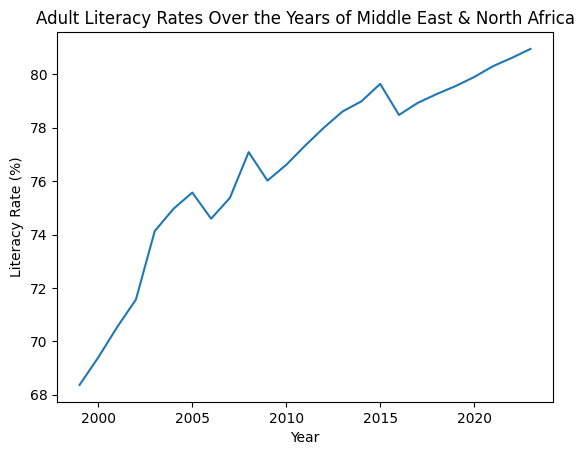

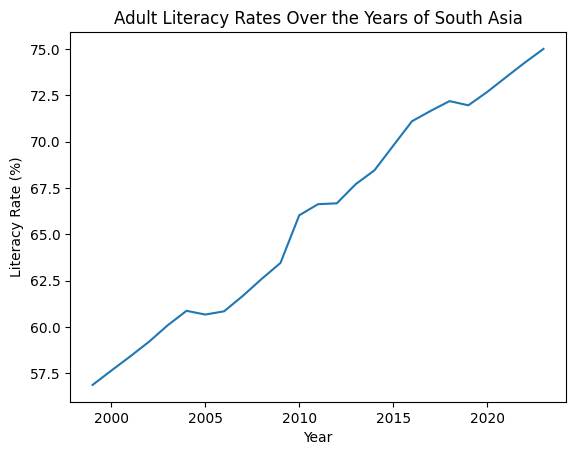

In [23]:
# Literacy rates over the years
for area in areas:
    sns.lineplot(data=df[df['country'] == area], x='year', y='lit_rate_adult_pct', errorbar=None)
    plt.title(f'Adult Literacy Rates Over the Years of {area}')
    plt.xlabel('Year')
    plt.ylabel('Literacy Rate (%)')
    plt.show()

In [127]:
data[data['in_pri_comp_rate_pct'] < 0]

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct,in_pri_comp_rate_pct
73,Albania,ALB,1999,3.592930,99.000000,109.427757,22.567840,16.434340,109.397301,69.284668,14.536520,-9.427757
74,Albania,ALB,2000,3.430170,99.000000,109.427757,22.567840,16.434340,109.711174,71.036084,15.154200,-9.427757
75,Albania,ALB,2001,3.458700,99.000000,109.427757,21.752440,16.963020,110.025047,72.787501,15.771880,-9.427757
76,Albania,ALB,2002,3.117800,98.571429,109.427757,21.623925,17.313455,110.338921,74.538918,16.389561,-9.427757
77,Albania,ALB,2003,3.138230,98.142857,109.427757,21.495410,17.663890,107.598259,77.751823,16.366240,-9.427757
...,...,...,...,...,...,...,...,...,...,...,...,...
5781,Viet Nam,VNM,2020,3.216529,96.000000,112.712566,20.276960,NaN,119.024054,93.789948,33.690084,-12.712566
5782,Viet Nam,VNM,2021,2.945175,96.000000,114.283411,20.276960,NaN,120.023386,96.066743,38.873238,-14.283411
5783,Viet Nam,VNM,2022,2.887387,96.000000,115.854256,20.276960,NaN,123.133724,97.249476,42.224239,-15.854256
5784,Viet Nam,VNM,2023,2.887387,96.000000,115.854256,20.276960,NaN,122.494152,97.249476,42.224239,-15.854256


In [24]:
data = df.copy()
data['in_pri_comp_rate_pct'] = 100 - data['pri_comp_rate_pct']
# Vẽ biểu đồ diện tích
for area in areas:
    fig = px.area(data[data['country'] == area], 
                x='year', 
                y=['pri_comp_rate_pct', 'in_pri_comp_rate_pct'],
                labels={'value': 'Percentage', 'variable': 'Education Level'},
                title=f'Education Level Over Time of {area}')
    fig.update_traces(line=dict(width=0))  # Tắt đường viền cho các khu vực
    fig.show()




In [129]:
# # Vẽ biểu đồ diện tích
# fig = px.area(df, 
#               x='Year', 
#               y=['No formal education', 'At least some basic education'],
#               labels={'value': 'Percentage', 'variable': 'Education Level'},
#               title='Education Level Over Time')
# fig.update_traces(line=dict(width=0))  # Tắt đường viền cho các khu vực

# # Hiển thị biểu đồ
# fig.show()

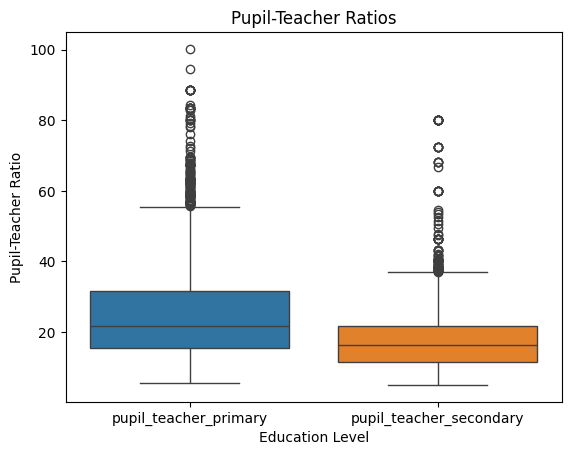

In [ ]:
# # Box plot of pupil-teacher ratios
# sns.boxplot(data=df[['pupil_teacher_primary', 'pupil_teacher_secondary']])
# plt.title('Pupil-Teacher Ratios')
# plt.xlabel('Education Level')
# plt.ylabel('Pupil-Teacher Ratio')
# plt.show()

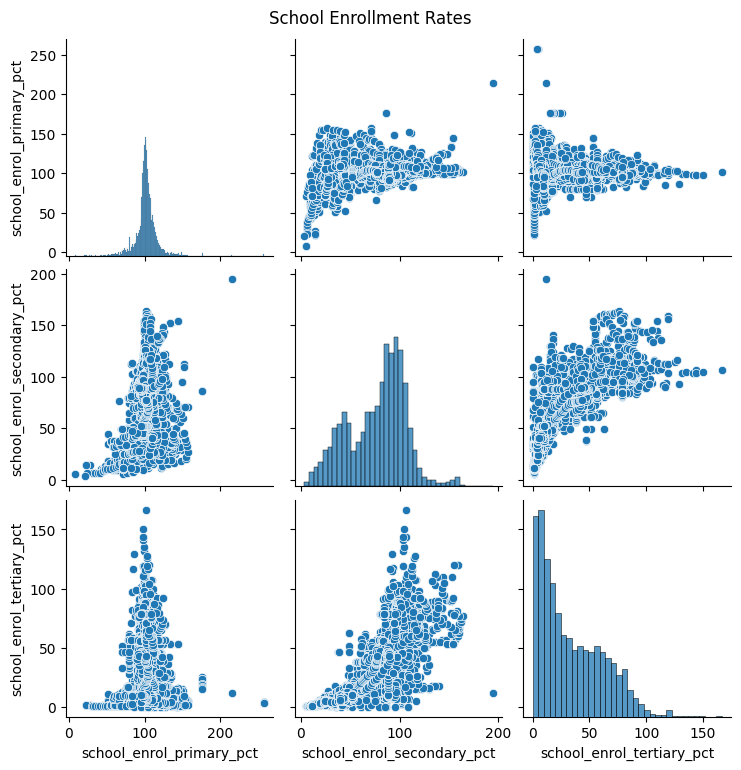

In [ ]:
# # Pair plot of school enrollment rates
# sns.pairplot(df[['school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']])
# plt.suptitle('School Enrollment Rates', y=1.02)
# plt.show()

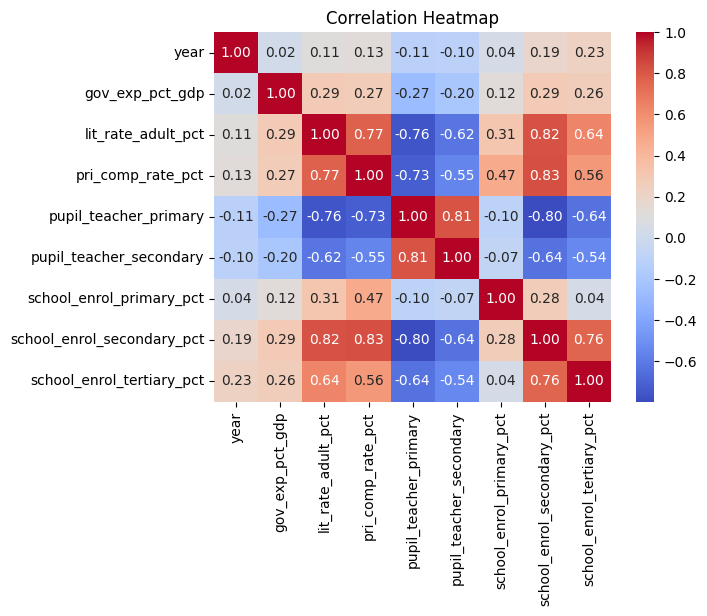

In [ ]:
# # Select only numeric columns
# numeric_df = df.select_dtypes(include=[np.number])

# # Compute the correlation matrix
# corr = numeric_df.corr()

# # Plot the heatmap
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

In [133]:
# import plotly.express as px
# import pandas as pd

# # Giả sử bạn có một DataFrame với dữ liệu như sau:
# data = {
#     'Year': [1820, 1850, 1900, 1950, 2000, 2020],
#     'No formal education': [100, 95, 85, 70, 50, 18.5],
#     'At least some basic education': [0, 5, 15, 30, 50, 81.5]
# }

# df = pd.DataFrame(data)

# # Vẽ biểu đồ diện tích
# fig = px.area(df, 
#               x='Year', 
#               y=['No formal education', 'At least some basic education'],
#               labels={'value': 'Percentage', 'variable': 'Education Level'},
#               title='Education Level Over Time')
# fig.update_traces(line=dict(width=0))  # Tắt đường viền cho các khu vực

# # Hiển thị biểu đồ
# fig.show()
